# How does torchdiffeq handle ODEs?

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torchdiffeq import odeint

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

### y-prime, y0, and t

In [4]:
true_y0 = torch.tensor([[2., 0.]])
t = torch.linspace(0., 25., 250)
true_A = torch.tensor([[-0.1, 2.0], [-2.0, -0.1]])

In [5]:
def func(t, y):
    return torch.mm(y**3, true_A)

### Solve for y

In [6]:
with torch.no_grad():
    true_y = odeint(func, true_y0, t, method='dopri5')

In [7]:
print(true_y)

tensor([[[ 2.0000e+00,  0.0000e+00]],

        [[ 1.7620e+00,  1.4329e+00]],

        [[ 6.5635e-01,  1.8657e+00]],

        [[-5.9475e-01,  1.8051e+00]],

        [[-1.5312e+00,  1.4280e+00]],

        [[-1.7143e+00,  4.7634e-01]],

        [[-1.6650e+00, -4.9581e-01]],

        [[-1.4380e+00, -1.2898e+00]],

        [[-7.6945e-01, -1.5738e+00]],

        [[ 1.1945e-02, -1.5571e+00]],

        [[ 7.3632e-01, -1.4997e+00]],

        [[ 1.2751e+00, -1.2360e+00]],

        [[ 1.4494e+00, -6.8483e-01]],

        [[ 1.4369e+00, -7.4219e-02]],

        [[ 1.4024e+00,  5.0209e-01]],

        [[ 1.2792e+00,  9.9761e-01]],

        [[ 9.4624e-01,  1.2781e+00]],

        [[ 4.7996e-01,  1.3370e+00]],

        [[ 7.7033e-03,  1.3190e+00]],

        [[-4.4025e-01,  1.2923e+00]],

        [[-8.3998e-01,  1.2126e+00]],

        [[-1.1138e+00,  9.9933e-01]],

        [[-1.2202e+00,  6.6320e-01]],

        [[-1.2267e+00,  2.9020e-01]],

        [[-1.2095e+00, -7.3050e-02]],

        [[-1.1876e+00, -4

### Plots

/Users/harold/anaconda3/envs/neural_odes/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


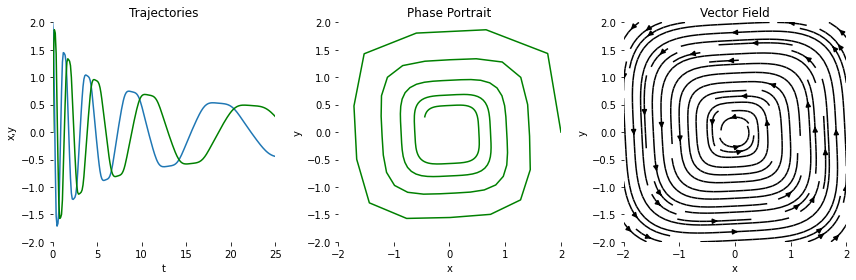

In [11]:
fig = plt.figure(figsize=(12, 4), facecolor='white')

ax_traj = fig.add_subplot(131, frameon=False)
ax_traj.cla()
ax_traj.set_title('Trajectories')
ax_traj.set_xlabel('t')
ax_traj.set_ylabel('x,y')
ax_traj.plot(t.numpy(), true_y.numpy()[:, 0, 0], t.numpy(), true_y.numpy()[:, 0, 1], 'g-')
# ax_traj.plot(t.numpy(), pred_y.numpy()[:, 0, 0], '--', t.numpy(), pred_y.numpy()[:, 0, 1], 'b--')
ax_traj.set_xlim(t.min(), t.max())
ax_traj.set_ylim(-2, 2)
# ax_traj.legend()

ax_phase = fig.add_subplot(132, frameon=False)
ax_phase.cla()
ax_phase.set_title('Phase Portrait')
ax_phase.set_xlabel('x')
ax_phase.set_ylabel('y')
ax_phase.plot(true_y.numpy()[:, 0, 0], true_y.numpy()[:, 0, 1], 'g-')
# ax_phase.plot(pred_y.numpy()[:, 0, 0], pred_y.numpy()[:, 0, 1], 'b--')
ax_phase.set_xlim(-2, 2)
ax_phase.set_ylim(-2, 2)

ax_vecfield = fig.add_subplot(133, frameon=False)

ax_vecfield.cla()
ax_vecfield.set_title('Vector Field')
ax_vecfield.set_xlabel('x')
ax_vecfield.set_ylabel('y')

y, x = np.mgrid[-2:2:21j, -2:2:21j]
dydt = func(0, torch.Tensor(np.stack([x, y], -1).reshape(21 * 21, 2))).cpu().detach().numpy()
mag = np.sqrt(dydt[:, 0]**2 + dydt[:, 1]**2).reshape(-1, 1)
dydt = (dydt / mag)
dydt = dydt.reshape(21, 21, 2)

ax_vecfield.streamplot(x, y, dydt[:, :, 0], dydt[:, :, 1], color="black")
ax_vecfield.set_xlim(-2, 2)
ax_vecfield.set_ylim(-2, 2)

fig.tight_layout()

plt.show(block=False)

In [12]:
print(mag)

[[2.2655684e+01]
 [1.9824959e+01]
 [1.7997684e+01]
 [1.6936157e+01]
 [1.6389442e+01]
 [1.6144659e+01]
 [1.6052763e+01]
 [1.6025827e+01]
 [1.6020500e+01]
 [1.6019995e+01]
 [1.6019987e+01]
 [1.6019995e+01]
 [1.6020500e+01]
 [1.6025827e+01]
 [1.6052763e+01]
 [1.6144659e+01]
 [1.6389442e+01]
 [1.6936159e+01]
 [1.7997684e+01]
 [1.9824959e+01]
 [2.2655684e+01]
 [1.9824959e+01]
 [1.6515991e+01]
 [1.4271147e+01]
 [1.2906681e+01]
 [1.2180426e+01]
 [1.1849009e+01]
 [1.1723489e+01]
 [1.1686576e+01]
 [1.1679274e+01]
 [1.1678581e+01]
 [1.1678569e+01]
 [1.1678580e+01]
 [1.1679272e+01]
 [1.1686577e+01]
 [1.1723488e+01]
 [1.1849008e+01]
 [1.2180426e+01]
 [1.2906681e+01]
 [1.4271147e+01]
 [1.6515991e+01]
 [1.9824959e+01]
 [1.7997684e+01]
 [1.4271147e+01]
 [1.1599710e+01]
 [9.8726931e+00]
 [8.9022722e+00]
 [8.4431419e+00]
 [8.2660656e+00]
 [8.2136307e+00]
 [8.2032356e+00]
 [8.2022495e+00]
 [8.2022343e+00]
 [8.2022495e+00]
 [8.2032356e+00]
 [8.2136316e+00]
 [8.2660656e+00]
 [8.4431410e+00]
 [8.9022713e+0

In [14]:
print(true_y.numpy()[:, 0, 1])

[ 0.          1.4328859   1.8657489   1.8051194   1.4280033   0.4763357
 -0.49580765 -1.2898015  -1.5738366  -1.5570803  -1.4997134  -1.2360183
 -0.68482566 -0.07421932  0.50208783  0.9976133   1.2780999   1.3370029
  1.3189745   1.2922735   1.2126114   0.9993252   0.66319513  0.29020345
 -0.07304962 -0.41955233 -0.7341401  -0.97220385 -1.0974889  -1.1313486
 -1.1248122  -1.1109332  -1.0937781  -1.0543225  -0.96355426 -0.80717576
 -0.60141057 -0.37603512 -0.15082031  0.06797238  0.27966094  0.4810616
  0.66157955  0.8047438   0.89835197  0.9445626   0.95785224  0.9547567
  0.9466744   0.9381788   0.9277597   0.9090132   0.8726177   0.8100783
  0.7184303   0.6023206   0.47112113  0.33394     0.1966509   0.06181031
 -0.07001916 -0.19879335 -0.3237494  -0.44252998 -0.55088335 -0.64341825
 -0.71546614 -0.7652024  -0.7944942  -0.80794215 -0.8110118  -0.80849355
 -0.8037597  -0.7986135  -0.79342383 -0.78729045 -0.7782374  -0.76350135
 -0.74002033 -0.7051686  -0.65757346 -0.5976262  -0.527379